---
**Created on** *Sat Oct 04 08:29:02 2025*  
**@author**: **Chaitanya.M, DVR and Dr. HS Mic College, Kanchikacharla**

[**GitHub Repository**](https://github.com/chaitanyamokkapati/MIC-ECE-MACHINE-LEARNING-LAB/tree/main/MACHINE%20LEARNING/LAB%20ACTIVITIES/LAB%20ACTIVITY%207)

---


# **Lab Activity 8**
### Write a program to implement k-Nearest Neighbor algorithm to classify the iris data set. Print both correct and wrong predictions.

## Objective
To understand and implement the k-Nearest Neighbors (k-NN) algorithm for classifying the Iris dataset and evaluate its performance.

1. **Understand k-NN Algorithm**: Learn the concept and working of the k-NN classification algorithm.
   
2. **Data Splitting**: Preprocess the Iris dataset by splitting it into training and testing sets.
   
3. **Model Training**: Train the k-NN model on the training data.
   
4. **Evaluate Performance**: Test the model on the test set and measure its accuracy.
   
5. **Analyze Predictions**: Identify correct and incorrect predictions made by the model.
   
6. **Experiment with k**: Observe how different values of k impact classification results.


## **Implementation**

### Cell 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

### Cell 2: Load the Iris Dataset from the CSV File

In [2]:
# Load the Iris dataset from a CSV file
df = pd.read_csv('iris.csv')  # Make sure the file path is correct

# Inspect the dataset (first few rows)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Cell 3: Separate Features and Labels

In [3]:
# Clean the column names by stripping spaces and converting to lowercase
df.columns = df.columns.str.strip().str.lower()

# Separate the features (X) and labels (y)
X = df.drop(columns=['species'])  # 'species' column should now exist in lowercase
y = df['species']  # Label column (species)

# Display the shape of X and y to ensure proper separation
print(f"Features shape: {X.shape}, Labels shape: {y.shape}")

Features shape: (150, 5), Labels shape: (150,)


### Cell 4: Split the Dataset into Training and Testing Sets

In [4]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

Training set shape: (120, 5), Testing set shape: (30, 5)


### Cell 5: Initialize the k-NN Classifier and Train the Model

In [5]:
# Initialize the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Cell 6: Make Predictions on the Test Set

In [6]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Display the first few predictions
print(f"Predictions: {y_pred[:10]}")

Predictions: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor']


### Cell 7: Evaluate the Model's Accuracy

In [7]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


### Cell 8: Display Correct and Incorrect Predictions

In [8]:
# Display correct predictions
print("Correct Predictions:")
correct_predictions = [(X_test.iloc[i].values, y_test.iloc[i], y_pred[i]) for i in range(len(y_test)) if y_test.iloc[i] == y_pred[i]]
for pred in correct_predictions:
    print(f"Sample: {pred[0]}, Actual: {pred[1]}, Predicted: {pred[2]}")

# Display incorrect predictions
print("\nIncorrect Predictions:")
incorrect_predictions = [(X_test.iloc[i].values, y_test.iloc[i], y_pred[i]) for i in range(len(y_test)) if y_test.iloc[i] != y_pred[i]]
for pred in incorrect_predictions:
    print(f"Sample: {pred[0]}, Actual: {pred[1]}, Predicted: {pred[2]}")

Correct Predictions:
Sample: [74.   6.1  2.8  4.7  1.2], Actual: Iris-versicolor, Predicted: Iris-versicolor
Sample: [19.   5.7  3.8  1.7  0.3], Actual: Iris-setosa, Predicted: Iris-setosa
Sample: [119.    7.7   2.6   6.9   2.3], Actual: Iris-virginica, Predicted: Iris-virginica
Sample: [79.   6.   2.9  4.5  1.5], Actual: Iris-versicolor, Predicted: Iris-versicolor
Sample: [77.   6.8  2.8  4.8  1.4], Actual: Iris-versicolor, Predicted: Iris-versicolor
Sample: [32.   5.4  3.4  1.5  0.4], Actual: Iris-setosa, Predicted: Iris-setosa
Sample: [65.   5.6  2.9  3.6  1.3], Actual: Iris-versicolor, Predicted: Iris-versicolor
Sample: [142.    6.9   3.1   5.1   2.3], Actual: Iris-virginica, Predicted: Iris-virginica
Sample: [69.   6.2  2.2  4.5  1.5], Actual: Iris-versicolor, Predicted: Iris-versicolor
Sample: [83.   5.8  2.7  3.9  1.2], Actual: Iris-versicolor, Predicted: Iris-versicolor
Sample: [111.    6.5   3.2   5.1   2. ], Actual: Iris-virginica, Predicted: Iris-virginica
Sample: [13.   4.8

### Cell 9: Confusion Matrix


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


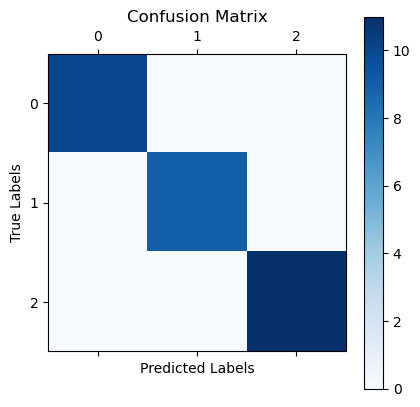

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualizing the confusion matrix
plt.matshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.show()

### Cell 10: Experiment with Different Values of *`k`*

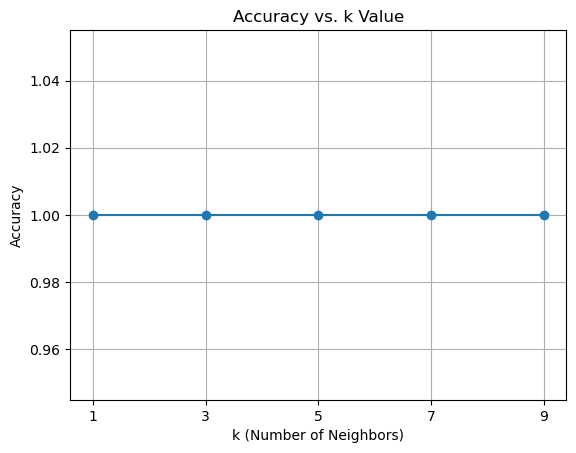

In [10]:
# Experimenting with different values of k
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting accuracy for different k values
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()